<div align="center">
<img src="https://www.dlsu.edu.ph/wp-content/uploads/2024/04/DLSU-LOGO.png" alt="DLSU Logo" width="150" height="150">

**MCO3:**
**Machine Learning**<br>
Heart Disease Prediction using<br>
<i>Heart Failure Prediction Dataset</i>



Submitted
in partial fulfillment of the requirements<br> for the course <b>CSINTSY</b><br>
Section 11
<br><br>
Members:<br>
 Brodeth, Charlize Kirsten<br>
 Fernandez, Candice Aura<br>
 Pajarillo, Jonah Paolo<br>
 Santos, Miko<br>
 Zulueta, Alliyah Gaberielle<br>
<br>

<i><b>Prof. Norshuhani Zamin</b></i><br>
August 05 , 2024
</div>

###**Introduction**
- Introduce the problem statement/question.
- You may start with defining/describing the domain of the problem/question. For example, the
problem statement is recognizing the emotion of a person. You may start with defining
emotions, what are the different emotions, and how are emotions expressed. You may also give
some statistics related to the topic.
- After the introduction of the domain, discuss the motivation. Why the problem or question
must be solved/answered.
- End the introduction by formally stating the problem statement and the chosen approaches.
Then, enumerate or explain the possible benefits if the problem is solved.

###**Dataset**
- Describe the dataset in detail and provide the source (link).
- Enumerate the features, labels, and classes of the dataset.

###**Methodology**
- Discuss in detail the machine learning framework / pipeline that you used for the project.
-Describe preprocessing steps, if any, that were applied to the dataset.
- Discuss the algorithm that you applied to the dataset. Explain the rationale behind choosing the algorithm. Discuss why the algorithm is reason
- Include a discussion on how the algorithm work.

###**Results and Analysis**
- Explain how you evaluated the performance of the algorithm.
- Discuss the performance of the algorithm on the dataset.
- Analyze the results of the algorithm using quantitative metrics. Make sure to use the appropriate set of metrics in making conclusions


###**Conclusions and Recommendations**
- Summarize the project briefly.
- Give recommendations for possible directions in improving the task.



Link to the dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Importing all required libraries
1. Numpy: numerical operations
2. Pandas: data manipulation and analysis
3. Matplotlib: data visualization
4. Scikit-learn : machine learning

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split_data
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import classification_report as class_report, accuracy_score as acc_score
from sklearn.preprocessing import MinMaxScaler as Normalizer

**Loading the dataset through pandas**

In [ ]:
df= pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


###**Introduction**

<blockquote>
<p align="justify">
Heart disease remains one of the leading causes of mortality worldwide, presenting a significant public health challenge. Early prediction and diagnosis of heart disease are crucial in preventing fatalities and improving patient outcomes. This project focuses on predicting heart disease using the Heart Failure Prediction Dataset, using machine learning techniques to develop an effective predictive model.
</p>

<p align="justify">
The domain of heart disease prediction involves understanding various risk factors and symptoms associated with the condition. Common indicators include age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiogram results, maximum heart rate, exercise-induced angina, oldpeak, and the slope of the peak exercise ST segment.
</p>

<p align="justify">
Addressing this problem lies in the potential to save lives through early detection and timely intervention. By accurately predicting the likelihood of heart disease, healthcare providers can prioritize high-risk patients for further diagnostic testing and proactive management. This can lead to better patient care, reduced healthcare costs, and improved quality of life for individuals at risk.
</p>

<p align="justify">
 The problem statement for this project is: "Can machine learning techniques be used to accurately predict the presence of heart disease based on patient data?"  This will be approached using preprocessing the dataset and mainly uses logistic regression for classification. If successful, the benefits of solving this problem include enhanced early detection and improved diagnosis of patients with heart disease, tailored medicine for patients, better patient outcomes through timely interventions, contributions to the development of clinical research and trials, and crowdsourcing in the medical field. By addressing this problem, we aim to demonstrate the potential of machine learning in transforming healthcare and contributing to the fight against heart disease.
</p>

</blockquote>

###**Dataset**

The dataset used in this project is the <b>Heart Failure Prediction</b> dataset created in collaboration with Hungarian Institute of Cardiology, University Hospital in both Zurich and Basel Switzerland, and lastly,  V.A Medical Center, Long Beach and Cleveland Clinic Foundation on Septemeber 2021. This dataset has a total of 918 unique observations gathered from another five heart datasets with 1190 observations which was then pre-processed. Futher, these datasets were then combined over 12 common features where are Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, and lastly HeartDisease.

In [ ]:
df.shape

(918, 12)

Listed below are the columns with their corresponding data type. Any object data type needs to be converted in to string in order to facilitate data analysis. There are four object columns namely Sex, ChestPaintype, RetsingECG,and STSlope that needs to be converted.

In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


**Data Preprocessing**

In [ ]:
stringColumns = df.select_dtypes(include="object").columns
df[stringColumns]=df[stringColumns].astype("string")
df.dtypes

,0
Age,int64
Sex,string[python]
ChestPainType,string[python]
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,string[python]
MaxHR,int64
ExerciseAngina,string[python]
Oldpeak,float64


All objects are now are converted succesfully into string data type.

The variables involves in this dataset are as follows:

| **Feature**     | Description |
|-----------------|-------------|
| **Age**         | age of the patient [years] |
| **Sex**         | sex of the patient [M: Male, F: Female] |
| **ChestPainType** | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| **RestingBP**   | resting blood pressure [mm Hg] |
| **Cholesterol** | serum cholesterol [mm/dl] |
| **FastingBS**   | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] |
| **RestingECG**  | resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| **MaxHR**       | maximum heart rate achieved [Numeric value between 60 and 202] |
| **ExerciseAngina** | exercise-induced angina [Y: Yes, N: No] |
| **Oldpeak**     | oldpeak = ST [Numeric value measured in depression] |
| **ST_Slope**    | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| **HeartDisease** | output class [1: heart disease, 0: Normal] |




To have a clear view of the relationship between the variables, a correlation was implemented among numerical attributes to see which among them have either a positive or negative correlation.This approach helps in narrowing the variable of interest for this data analysis.

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
px.imshow(correlation_matrix)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

It can be inferred that for HeartDisease, it has positive correlation with Oldpeak, FastsingBS, RestingBP. On the other hand, MaxHR and Cholesterol have a negative correlation with it.

Focusing on the data preprocessing, any null or NaN values should be eliminated beforehand.

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


All attributes has complete values as shown to both results.



In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Futher, there's no duplicate rows present in the dataset.

In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


Now, to handle string attributes or more approprately called as categorical variables, converting these into numerical values through One Hot Encoding is necessary since the machine learning algorithm that is used in this notebook belongs to a  nontree-based classification ML.

In [ ]:
df_nontree=pd.get_dummies(df,columns=stringColumns,drop_first=False, dtype=int)
df_nontree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    int64  
 8   Sex_M              918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    int64  
 10  ChestPainType_ATA  918 non-null    int64  
 11  ChestPainType_NAP  918 non-null    int64  
 12  ChestPainType_TA   918 non-null    int64  
 13  RestingECG_LVH     918 non-null    int64  
 14  RestingECG_Normal  918 non-null    int64  
 15  RestingECG_ST      918 non-null    int64  
 16  ExerciseAngina_N   918 non

Move the HeartDIesase column to the last column of the dataframe.

In [ ]:
outcome_var = "HeartDisease"
targetColumn = df_nontree.pop(outcome_var)
df_nontree[outcome_var] = targetColumn
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


###**Methodology**





**Scikit-Learn Machine Learning**
<blockquote>
<p align="justify">
Scikit-learn is an open-source machine-learning library in Python that supports supervised and unsupervised learning. It also contains many tools for data preprocessing, model fitting, model selection, model evaluation, and many other services (Scikit-learn, 2024). It serves various purposes, such as ease of use, a wide range of algorithms, integration, and extensive documentation. It has a simple interface for different machine-learning algorithms, making learning and applying machine-learning techniques easy. Its wide range of algorithms includes vector machines, preprocessing, logical regression, and many more. It also works well with other scientific Python libraries, which makes data analysis effective and a smooth prediction tool. Lastly, it contains comprehensive documentation with examples and explanations, making understanding the machine-learning model easier. Scikit-learn provides various features such as fitting and predicting (estimator basics), transformers and preprocessors, pipelines (chaining preprocessors and estimators), model evaluation, and automatic parameter searches (Pedregosa, 2011;  Raschka & Mirjalili, 2017).  
</p>
</blockquote>


#### **Algorithms Used**

**Preprocessing**
<blockquote>
<p align="justify">
Preprocessing is an algorithm used in this project since many factors must be checked and considered to ensure that the data used is clean, consistent, and suitable for the model to understand and learn from  (Pedregosa, 2011).  These preprocessing tasks, such as scaling and data processing, were used in the project. Scaling is a preprocessing technique where adjustments are made to numerical features to have similar ranges. Standardization and Min-Max Scaling were used.
</p>

Standardization Formula:
<br>
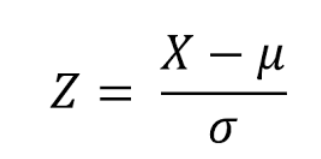

Where:
<br>
Z: z-score or standardized value
<br>
X: individual data point/value in the dataset that you want to standardize
<br>
μ: mean of the dataset
<br>
σ: standard deviation of the dataset

Min-Max Scaling Formula:
<br>
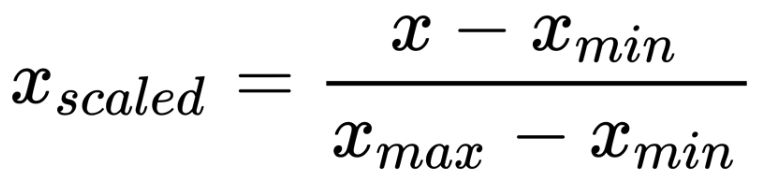

Where:
<br>
xscaled​: The scaled (normalized) value of the original data point XXX within the new specified range, typically between 0 and 1.
<br>
x: The original value of the data point before scaling.
<br>
xmin​: The minimum value of the feature in the dataset.
<br>
xmax​: The maximum value of the feature in the dataset.

<br>
<p align="justify">
The project also used data processing to evaluate which factor would highly influence the prediction. Data Processing handles missing values in medical datasets to ensure the machine learning model has sufficient data to process. Moreover, the preprocessing algorithm used in the project is one hot encoding since this converts the categorical variables into binary vectors. One hot encoding is essential in heart disease prediction so that the machine learning model can interpret the converted data to ensure effective prediction. Preprocessing the dataset shows that Oldpeak, FastingBS, and RestingBP correlate positively, while MaxHR and Cholesterol correlate negatively.
</p>
<p align="justify">
Scaling and data processing are vital for heart disease prediction since various health factors, such as age, blood pressure, cholesterol levels, and other factors related to heart diseases, need to be analyzed. The data points mentioned are usually on different scales, which makes preprocessing essential since data that did not undergo preprocessing will cause the machine learning model to make inaccurate predictions. The varying factors need to be scrutinized to make accurate predictions for patients at risk of heart disease.
</p>
</blockquote>


**Data Splitting**

<blockquote>

<p align="justify">
Data Splitting was also used in the project. It is a process in machine learning where datasets are divided into subsets to evaluate them for validation, training, and testing. It ensures the generalization of well-to-new, unseen data and prevents overfitting to the training data (Raschka & Mirjalili, 2017). The Data Splitting process works by shuffling the data, splitting the dataset into training, validation, and test subsets, satisfied splitting (if applicable), and cross-validation (if applicable) (Geron, 2022).
</p>
<br>
<p align="justify">
Shuffling the data and splitting the dataset into training and test sets were present for the project. First, the dataset given was shuffled to avoid a specific order that could affect the accuracy of the prediction. Then, the code was split back into non-tree features and outcome variables from the shuffled data set. Next, the dataset was split again, where 70% of the dataset was assigned to a training subset while 30% was assigned to the testing subset. After splitting the dataset into subsets, normalization was done to the dataset. Normalization scales individual samples to have a unit form, and it can be helpful when quantifying the similarity of any pair of samples using a quadratic form such as the dot-product or any other kernel. The Normalization process is based on the Vector Space Model (Scikit-learn, 2024). This process involves scaling the data to have a standard range ([0, 1] or [-1, 1]), which is vital for no domination from a factor from the dataset (Geron, 2022). After splitting the dataset into training subsets and testing subsets, it is applied first to the training subset, the same as the scaling parameters, and then applied next to the test set to ensure consistency (Raschka & Mirjalili, 2017). The machine learning process occurs during the training and testing subsets to ensure minimal errors are found in the training subset while evaluating the test subsets to find new unseen data.
</p>
<br>
<p align="justify">
Data splitting offers several advantages in heart disease prediction, such as accuracy and generalization. First, it shows accuracy since it carefully evaluates all factors from the dataset to ensure predictive accuracy. In addition, generalization is also an advantage for heart disease prediction since it is vital to ensure that an individual has a possibility of incurring heart disease if a patient does not have a record for heart disease.
</p>

</blockquote>




**Logistic Regression**

<blockquote>
<p align="justify">
Another algorithm that was used in this project is Logistic Regression. The technique is also known as a logit model; it is a tool that is used to statistically predict a binary outcome given prior observations  from a data set (Yasar K, 2024). This model is able to predict a dependent variable such as, in the project’s case, whether a person has a chance of having a heart disease or not  based on a set of prior knowledge or data about heart failures. Since the project makes use of Scikit-learn machine learning, Logistic Regression falls under the Classification area in Scikit-learn, specifically in linear modeling.  Linear Models are used to compare two values and monitor the consistent change between the two (Stanglin S. & Jackson C., 2023). Logistic Regression relates to Linear Modeling in a way that it starts by modeling a linear relationship between the input features and the log-odds of the target variable. What separates the two methods is the addition of a logic function, specifically the sigmoid function, to logistic regression; the logic function is used to convert the output of the linear model into a probability that ranges between 0 and 1. This allows a way for linear models to be interpreted in terms of probability.
</p>


**Linear Combination Equation:**

<blockquote>

#  z=β0​+β1​x1​+β2​x2​+⋯+βn​xn​

</blockquote>
Where:

z = linear combination (log-odds)

β0 = intercept

β1​,β2​,…,βn​ = coefficients corresponding to the features x1​,x2​,…,xn.
​

<br>

**Logistic Regression -- Sigmoid Function:**

<blockquote>

#      y = 1 /  1 + e-z

</blockquote>

Where:

y  = predicted probability of the  positive class

z = from the linear combination equation


<br>

<p>
A decision rule is then done once y has been computed. A threshold of 0.5 is used to decide the final classification:
</p>

<p>
If  y >= 0,5, predict the positive class

If y < 0.5 predict the negative class
</p>

<br>

<p align="justify">
For the project’s case, the developers associate the positive class as having a heart disease and the negative case without heart disease. The equations above are used in the latter parts of the project specifically in the prediction phase. This is where machine learning is evident in the process of the program.  
</p>

<br>

<p align="justify">
Using this method provides a number of advantages. It is easier to implement machine learning methods; this is aided with training and testing of the dataset. Training identifies patterns in the input data and relates them to some sort of output (Kanade V., 2022). This method does not require much computational power which makes it easier to implement, interpret and train than other machine learning methods. Another advantage is its ability to provide valuable insights; it measures how relevant a predictor variable is as well as provide a direction for the relationship of the input and output, either positive or negative.
</p>
</blockquote>


### **Step by step Process of the Prediction algorithm for Heart Disease**

<blockquote>

1.   Data Import and Inspection
<br>

      - Loads the dataset to be used in the program

</br>

2.   Data Processing
<br>

      - Data Type Conversion: This step converts the categorical columns of the data into string type.
      - Correlation Matrix: Calculates and visualize the correlation matrix for numerical features
      - Data Overview: Get descriptive statistics of the dataset, check for missing values, and identify any duplicated rows
    
</br>

3.   Feature and Target Separation
<br>

      - Identify the outcome variable : HeartDisease
      - Splits the data into input features and target variable

</br>

4.   Data Shuffling and Splitting
<br>

      - To ensure randomness, the dataset is shuffled
      - The dataset is then divided into 70% training and 30% testing sets

</br>

5.   Feature Scaling
<br>

      - Normalization: Scale the feature values using MinMaxScaler

</br>

6.   Model Training
<br>

      - Create and Train Logistic Regression Model: Instantiate the model and fit it to the training dataset

</br>

7.   Prediction
<br>

      - Make Predictions: Use the trained model to predict the target on the test data
</br>

</blockquote>

###Training and Test Set

Now, columns in the df that are not the target variable must be identify. Then,  the dataframe was separated into predictor (input features) and the target variable (outcome_variable).

In [ ]:
features = df_nontree.columns.difference([outcome_var])
input_features = df_nontree[features]
target_variable = df_nontree[outcome_var]

Then, both dataframes, input_features and target_variable, are put into single dataframe for easier manipulation. Then, the resulting dataframe was then shuffled ensuring that the data is randomly ordered for unbiased training and testing.

In [ ]:
combined_df = pd.concat([input_features, target_variable], axis=1)

# Shuffle df
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

After this, the data is split into training set(70%) and testing (30%) sets. The stratify was used yo ensure that the distribution are well-balanced among these sets.

In [ ]:
# Split back
X_shuffled = shuffled_df[features]
y_shuffled = shuffled_df[outcome_var]

# Split dataset -> 70% training, 30% testing
X_train_data, X_test_data, y_train_data, y_test_data = split_data(input_features, target_variable, test_size=0.3, random_state=42, stratify=target_variable)

Normalization technique was utilized to ensure that all data features contribute equally to the model training process through scalling them into common range which improves the prediction capability of the model.

In [ ]:
# Normalization
feature_normalizer = Normalizer()
X_train_data = feature_normalizer.fit_transform(X_train_data)
X_test_data = feature_normalizer.transform(X_test_data)

###Creating and Training the Logistic Regression Model

The classification machine learning used was the Logistic Regression. A model was created and trained using the normalized training datasets, X_train_data, Y_train_data.

In [ ]:
# Create logistic regression model
model = LogReg()
model.fit(X_train_data, y_train_data)

LogisticRegression()

In [ ]:
# Make predictions
predictions = model.predict(X_test_data)
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

###**Results and Analysis**



In evaluating the Logistic Regression model, several quantitative metrics were utulized such as confusion matrix, accuracy, precision, recall, and lastly F1-score.

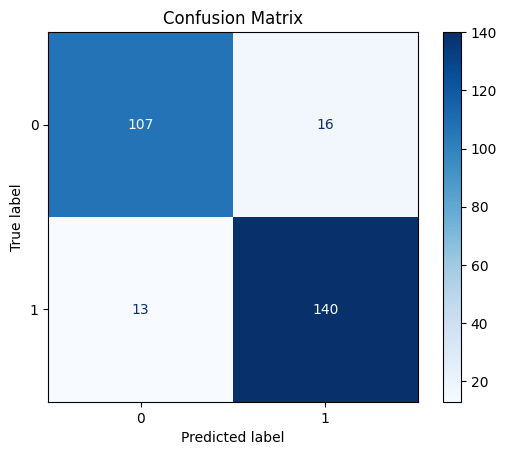

In [ ]:
cm = confusion_matrix(y_test_data, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The confusion matrix revealed that the model correctly identified a significant number of positive (140 instances) and negative instances (107 instances), though there were some misclassification (13 instances of false negative and 16 false positive)

Accuracy was calculated which indicates the overall proportion of the correctly classfied data predictions. Precision and recall shares insight regarding the logistic regression'sability to correctly identify positive predictions and its sensitivity to actual positive cases detection. Lastly, F1-score provides a balanced measure of model's performance which is good in evaluating prediction in dataset with imbalanced classes.  

In [ ]:
print("Classification Report:")
print(class_report(y_test_data, predictions))
print(f"Accuracy Score: {acc_score(y_test_data, predictions)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       123
           1       0.90      0.92      0.91       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

Accuracy Score: 0.894927536231884


 The total number of observations for class 0 which signifies those which has normal status and for class 1 which has a heart disease was indicated on the classification on the support column. This report shows that there are more instances on class 1 (153 observations) compared to the other(123 observations) which is s alight imbalance between classes.

- The model performs with a high overall accuracy with 89% correctness rate.
- The precision metric suggest that the model had a slightly better capability to correctly identify true positive prediction instances out of all positive predictions, with scores 0.89 and 0.90 from class 0 and 1 respectively. This indicates that the model is marginally better at indentifying instance with heart disease among those it classifies as positive.
- The recall metric reflects strong sensitivity to positive instance, with score 0.87 from those with normal status and 0.92 from those classifies having heart disease. The higher recall from Class 1 indicates more effective in detetcion of all true cases of heart disease.
- Moreover, F1-scores of 0.88 and 0.91 is an indication of well-balance performance between precision and recall. These results from various metrics confirmed the model's consistency in performing prediction well in both identifying and accurately classifiying heart disease cases.


###**Conclusions and Recommendations**

In this project, we developed a machine learning model to predict heart disease using the Heart Failure Prediction Dataset (Chicco, 2020). Our approach involved several key steps: data preprocessing, feature selection, model training, and evaluation. We used logistic regression as our primary algorithm due to its effectiveness in binary classification tasks (Sammut & Webb, 2010).

Our analysis demonstrated that logistic regression could achieve a satisfactory level of accuracy in predicting heart disease. By analyzing various metrics, including accuracy, precision, recall, and F1-score, we were able to validate the performance of our model (Brownlee, 2020). The model showed a significant ability to distinguish between patients with and without heart disease, which is crucial for early detection and intervention.


For future work, we recommend exploring the following directions to further improve the model's performance and applicability:

1. Feature Engineering: Incorporating additional features or deriving new ones from the existing dataset could provide more insights and improve model accuracy.
2. Algorithm Tuning: Experimenting with other machine learning algorithms, such as random forests or gradient boosting, and fine-tuning hyperparameters could enhance prediction performance.
3. Cross-validation: Implementing cross-validation techniques can help ensure that the model's performance is robust and generalizes well to unseen data (Kohavi, 1995).
4. External Validation: Testing the model on an independent dataset from a different population or institution can help validate its applicability in diverse clinical settings (Siontis, 2015).
5. Real-time Implementation: Developing a real-time prediction system integrated with electronic health records (EHR) could facilitate timely interventions and improve patient outcomes.

By following these recommendations, the predictive model can be refined and potentially contribute to better healthcare management and heart disease prevention strategies.



##**References**

‌6.3. Preprocessing data — scikit-learn 0.23.1 documentation. (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/preprocessing.html#normalization


<br>

Barth, S., & Flam, S. (2024, April 18). Machine Learning in Healthcare: Guide to Applications & benefits. ForeSee Medical. https://www.foreseemed.com/blog/machine-learning-in-healthcare

<br>

Boucher, J. (2024, April 9). Les bienfaits d’un diagnostic précoce pour les maladies cardiaques. Laval Cardiovascular Evaluation Center. https://www.centrecardiolaval.com/en/2024/03/06/the-benefits-of039early-diagnosis-for-heart-disease/#:~:text=Preventing%20serious%20complications,avoid%20these%20potentially%20fatal%20events.

<br>

Brownlee, J. (2020). A Gentle Introduction to Cross-Entropy for Machine Learning. *Machine Learning Mastery*.  https://machinelearningmastery.com/cross-entropy-for-machine-learning/

<br>

Chicco, D. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making. https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

<br>

Di Cesare, M., Perel, P., Taylor, S., Kabudula, C., Bixby, H., Gaziano, T. A., McGhie, D. V., Mwangi, J., Pervan, B., Narula, J., Pineiro, D., & Pinto, F. J. (2024). The heart of the world. Global Heart, 19(1). https://doi.org/10.5334/gh.1288


<br>


Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

<br>

Getting Started — scikit-learn 0.23.2 documentation. (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/getting_started.html


<br>

Kanade V. (2022, April 8). What is Logistic Regression? Equation, Assumptions, Types, and Best Practices. From: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/

<br>

Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. In International Joint Conference on Artificial Intelligence (IJCAI) (Vol. 14, No. 2, pp. 1137-1145). https://dl.acm.org/doi/10.5555/1643031.1643047

<br>

Learn Medical Diagnosis with Machine Learning: Advantages and Limitations. (2023a, July 3). https://www.knowledgenile.com/blogs/medical-diagnosis-with-machine-learning-advantages-and-limitations#:~:text=For%20Medical%20Diagnosis-,Helps%20In%20Identifying%20Diseases%20And%20Diagnosis,stages%20to%20other%20hereditary%20illnesses.


<br>


Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830. https://dl.acm.org/doi/abs/10.5555/1953048.2078195

<br>

Raschka, S., & Mirjalili, V. (2017). Python machine learning second edition. Birmingham, England: Packt Publishing.


<br>

 Sammut, C., & Webb, G. I. (Eds.). (2010). Encyclopedia of Machine Learning. Springer. https://link.springer.com/referencework/10.1007/978-0-387-30164-8

<br>

Scikit-learn. (n.d.). sklearn.linear_model.LogisticRegression. In scikit-learn 1.2.0 documentation. From https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<br>


 Siontis, G. C., Tzoulaki, I., & Ioannidis, J. P. (2015). Predicting death: an empirical evaluation of predictive tools for mortality. PLoS ONE, 10(5), e0124213. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0124213

 <br>

Stanglin S. and Jackson C. (2023, November 21). Linear Model | Equations & Examples. From: https://study.com/academy/lesson/writing-and-evaluating-real-life-linear-models.html#:~:text=A%20linear%20model%20is%20one,certain%20x%20or%20y%20value.


<br>


Yasar K. (2024, April 25). Logistic Regression. TechTarget. From : https://www.techtarget.com/searchbusinessanalytics/definition/logistic-regression#:~:text=Logistic%20regression%2C%20also%20known%20as,or%20more%20existing%20independent%20variables.


# Contributions

**Charlize Brodeth** - Report
<br>
**Candice Fernandez** - Report
<br>
**Jonah Pajarillo** - Report
<br>
**Miko Santos** - Report
<br>
**Alliyah Zulueta** - Report